In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import nltk
import sklearn


In [79]:
data=pd.read_csv("data/vax_reddit.csv")
data['text'] = data['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [80]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
np.random.seed(42)
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shaunkim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    if text =="Comment":
        return result
    
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [82]:
preprocessed=[]
preprocessed=data['text'].apply(lambda x:preprocess(x))

In [83]:
preprocessed.append(data['title'].apply(lambda x:preprocess(x)))

0                                  [hear, interest, know]
1       [true, fund, melinda, gate, foundat, provaccin...
2                  [video, question, fund, gate, foundat]
3                                                      []
4                                               [variant]
                              ...                        
7074                                                   []
7075                                                   []
7076                                                   []
7077                                                   []
7078                                                   []
Length: 14158, dtype: object

In [84]:
preprocessed=list(filter(None,preprocessed))
len(preprocessed)

6392

In [128]:
dictionary = gensim.corpora.Dictionary(preprocessed)

In [86]:
bow_corpus = [dictionary.doc2bow(doc) for doc in preprocessed]

lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 8, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [87]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.024*"vaccin" + 0.016*"autism" + 0.011*"studi" + 0.011*"caus" + 0.011*"link" + 0.008*"actual" + 0.008*"read" + 0.008*"anti" + 0.007*"research" + 0.007*"know"


Topic: 1 
Words: 0.083*"vaccin" + 0.017*"peopl" + 0.011*"covid" + 0.011*"immun" + 0.011*"virus" + 0.008*"know" + 0.008*"effect" + 0.007*"death" + 0.007*"like" + 0.007*"diseas"


Topic: 2 
Words: 0.010*"vaccin" + 0.009*"peopl" + 0.007*"cancer" + 0.006*"live" + 0.006*"govern" + 0.005*"vacuna" + 0.005*"understand" + 0.005*"covid" + 0.005*"true" + 0.005*"point"


Topic: 3 
Words: 0.027*"like" + 0.022*"think" + 0.021*"peopl" + 0.019*"know" + 0.014*"anti" + 0.011*"want" + 0.010*"vaxxer" + 0.008*"post" + 0.007*"deni" + 0.007*"actual"


Topic: 4 
Words: 0.016*"thank" + 0.009*"get" + 0.009*"fuck" + 0.009*"like" + 0.009*"know" + 0.008*"delet" + 0.007*"peopl" + 0.007*"vaccin" + 0.007*"go" + 0.007*"look"


Topic: 5 
Words: 0.019*"vaccin" + 0.013*"studi" + 0.011*"like" + 0.011*"peopl" + 0.010*"sourc" + 0.009*"read" + 0.009*

Getting rid of the too often and two few words

In [88]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1

0 hear
1 interest
2 know
3 disclos
4 discript
5 exampl
6 foundat
7 fund
8 gate
9 melinda
10 provaccin
11 true
12 video
13 question
14 variant
15 abil
16 aren
17 breadth
18 busi
19 care
20 caus
21 come
22 compani
23 confer
24 contain
25 correct
26 cough
27 creat
28 data
29 efficaci
30 evad
31 exist
32 extend
33 fear
34 handl
35 health
36 hospit
37 immun
38 improv
39 induc
40 infect
41 instead
42 keep
43 lather
44 lower
45 make
46 massag
47 money
48 need
49 pandem
50 peopl
51 pharma
52 process
53 rat
54 realiti
55 reopen
56 repeat
57 rins
58 slow
59 sneez
60 speed
61 spread
62 step
63 sure
64 takeaway
65 tell
66 temporarili
67 unfortun
68 vaccin
69 version
70 work
71 breakthrough
72 case
73 covid
74 deal
75 fauci
76 guy
77 post
78 say
79 surpris
80 york
81 chopper
82 quick
83 stat
84 appar
85 articl
86 herd
87 natur
88 read
89 variantz
90 proof
91 better
92 claim
93 doesnt
94 stop
95 crazi
96 actual
97 alleg
98 ask
99 author
100 autism
101 crappi
102 get
103 info
104 look
105 misinform
1

867 reevalu
868 reliev
869 rest
870 hand
871 magnitud
872 order
873 releas
874 vaxer
875 wavi
876 avoid
877 billion
878 entir
879 estim
880 iron
881 liter
882 newsflash
883 one
884 orient
885 rememb
886 resum
887 ten
888 trivial
889 variabl
890 act
891 vaxxer
892 paper
893 societi
894 toilet
895 actress
896 danc
897 tune
898 switch
899 cervic
900 didnt
901 delay
902 indic
903 turn
904 decad
905 steep
906 young
907 afaik
908 base
909 expos
910 strain
911 unlik
912 cool
913 miscarriag
914 stillbirth
915 yike
916 adrreport
917 assess
918 draw
919 evalu
920 html
921 http
922 index
923 interpret
924 necessarili
925 robust
926 substanc
927 unsaf
928 agenda
929 downplay
930 pathet
931 sake
932 shame
933 shill
934 soulless
935 wellb
936 yeah
937 treat
938 dishonest
939 incompet
940 highest
941 overal
942 quackeri
943 shilleri
944 blame
945 buy
946 quit
947 attack
948 hit
949 impact
950 jump
951 parachut
952 pavement
953 plane
954 shock
955 expert
956 comment
957 physic
958 deliber
959 elder
96

1616 recycl
1617 search
1618 trash
1619 absorpt
1620 agent
1621 anim
1622 apart
1623 bacteri
1624 bacteria
1625 bacterium
1626 bioactiv
1627 biochem
1628 biolog
1629 blossom
1630 bowel
1631 cellular
1632 chemic
1633 cleans
1634 climat
1635 clock
1636 colder
1637 consum
1638 debri
1639 decompos
1640 detoxif
1641 discard
1642 dissolv
1643 dump
1644 elimin
1645 enter
1646 enzymat
1647 excret
1648 flourish
1649 fruit
1650 function
1651 fungus
1652 germ
1653 humid
1654 illus
1655 indoor
1656 macrocosm
1657 mass
1658 materi
1659 membran
1660 microbi
1661 microcosm
1662 microlevel
1663 moistur
1664 mouth
1665 mucus
1666 outer
1667 oxygen
1668 parasit
1669 phagocyt
1670 pick
1671 plant
1672 prolifer
1673 resort
1674 season
1675 signal
1676 solvent
1677 sort
1678 strengthen
1679 temperatur
1680 tissu
1681 toxifi
1682 toxin
1683 tree
1684 ubiquit
1685 util
1686 utiliz
1687 winter
1688 authorit
1689 mock
1690 paul
1691 psychopath
1692 airborn
1693 concoct
1694 forget
1695 irrelev
1696 minutia
169

2366 latch
2367 sympath
2368 context
2369 scale
2370 squigg
2371 abysm
2372 epistemolog
2373 weigh
2374 neurotoxin
2375 concept
2376 illustr
2377 infograph
2378 provok
2379 flatten
2380 bake
2381 credenc
2382 credenti
2383 deciet
2384 misguid
2385 nces
2386 paranoid
2387 peak
2388 slap
2389 theorist
2390 thumb
2391 twiddl
2392 valley
2393 fever
2394 scarlet
2395 tthis
2396 comedi
2397 antibiot
2398 treatabl
2399 dissapoint
2400 dream
2401 nonesens
2402 alot
2403 april
2404 briefli
2405 shift
2406 cherri
2407 liar
2408 page
2409 sizabl
2410 hurt
2411 autoimmun
2412 ban
2413 channel
2414 quack
2415 astrazenica
2416 out
2417 assang
2418 rapist
2419 djokov
2420 walk
2421 disclaim
2422 arguabl
2423 ballsi
2424 player
2425 tenni
2426 citat
2427 celebr
2428 repress
2429 complex
2430 gossip
2431 hatter
2432 marriag
2433 perpetu
2434 persecut
2435 plan
2436 reput
2437 whatsoev
2438 hijack
2439 sole
2440 thread
2441 desper
2442 nonstori
2443 inspir
2444 harvey
2445 peni
2446 weinstein
2447 autis

3116 fraudul
3117 dumbass
3118 febril
3119 limp
3120 oxymoron
3121 red
3122 seizur
3123 specialist
3124 humansarefre
3125 infowar
3126 obituari
3127 chem
3128 colorado
3129 endless
3130 reinforc
3131 jordan
3132 dogma
3133 memo
3134 realm
3135 satisfi
3136 subtleti
3137 crystal
3138 vaxtard
3139 democrat
3140 republican
3141 overcom
3142 disqualifi
3143 dummi
3144 skittl
3145 smarti
3146 candi
3147 hagu
3148 netherland
3149 hush
3150 maim
3151 quiet
3152 taxpay
3153 reach
3154 seatbelt
3155 downsid
3156 techniqu
3157 urmmm
3158 plagiar
3159 arent
3160 rig
3161 nois
3162 bubbl
3163 lame
3164 wrascal
3165 wrussian
3166 righttttt
3167 haemorrag
3168 trauma
3169 tumor
3170 contradictori
3171 salesman
3172 uncomfort
3173 comprehend
3174 enorm
3175 struggl
3176 bliss
3177 harri
3178 magazin
3179 setup
3180 vice
3181 voter
3182 demonstr
3183 elit
3184 generic
3185 miasmic
3186 toxilog
3187 vaccinosi
3188 commi
3189 libtard
3190 smell
3191 sniff
3192 realist
3193 tinyyyy
3194 wacki
3195 dong
3

3866 cramp
3867 fuzzi
3868 handi
3869 swift
3870 temp
3871 difficulti
3872 distort
3873 round
3874 aggress
3875 assist
3876 concentr
3877 nyquil
3878 psychiatr
3879 psychosi
3880 tdap
3881 celebratori
3882 creek
3883 muscoge
3884 selfi
3885 dizzi
3886 drift
3887 intens
3888 overdo
3889 pronounc
3890 shiver
3891 sluggish
3892 sweat
3893 toss
3894 sunlight
3895 bore
3896 horribl
3897 tender
3898 upper
3899 phizer
3900 nephew
3901 nicu
3902 pregnant
3903 ireceiv
3904 psychologist
3905 afterward
3906 asleep
3907 lay
3908 limb
3909 odd
3910 recuper
3911 unev
3912 vari
3913 semi
3914 wednesday
3915 lightheaded
3916 howdi
3917 phobia
3918 pleasant
3919 thalidomid
3920 badg
3921 charm
3922 reel
3923 awww
3924 bleach
3925 morning
3926 ootl
3927 snowbal
3928 tith
3929 deltoid
3930 roommat
3931 workout
3932 chat
3933 unconsci
3934 bed
3935 crysi
3936 fli
3937 generous
3938 healthwork
3939 peru
3940 tank
3941 vacunag
3942 volunt
3943 benadryl
3944 email
3945 famotidin
3946 spacey
3947 adam
3948 cl

4615 christma
4616 emot
4617 revert
4618 incel
4619 tear
4620 deborah
4621 devot
4622 backpack
4623 freethedick
4624 crochet
4625 burgundi
4626 turkey
4627 cling
4628 grief
4629 journey
4630 unload
4631 nosir
4632 bottomless
4633 fascist
4634 behold
4635 glori
4636 reboot
4637 femen
4638 unfunni
4639 siberia
4640 cig
4641 trick
4642 vape
4643 antidepress
4644 bupropion
4645 wellbutrin
4646 pack
4647 tempt
4648 ritalin
4649 ssri
4650 cessat
4651 mushroom
4652 psilocybin
4653 solid
4654 unscath
4655 vilifi
4656 wed
4657 bustin
4658 chop
4659 dot
4660 interject
4661 spi
4662 trademark
4663 dehydr
4664 sinpli
4665 buffer
4666 diffrent
4667 messeng
4668 paylod
4669 cring
4670 dear
4671 edgi
4672 youth
4673 curbsid
4674 rnase
4675 fresh
4676 sock
4677 waist
4678 budget
4679 chime
4680 delin
4681 disssoci
4682 excacerb
4683 itch
4684 lollipop
4685 taper
4686 throat
4687 strand
4688 biothrax
4689 corpsman
4690 redo
4691 embarass
4692 communist
4693 dimens
4694 distant
4695 hollywood
4696 immin

5365 vacciant
5366 robot
5367 dunno
5368 razorblad
5369 boxknif
5370 emb
5371 razor
5372 firefight
5373 swiss
5374 ken
5375 aerious
5376 belt
5377 cliff
5378 onlt
5379 seat
5380 traffic
5381 enact
5382 illiter
5383 reeeeeee
5384 boil
5385 choir
5386 wokekid
5387 kobiet
5388 strajk
5389 aaah
5390 stir
5391 wholesom
5392 zenecca
5393 bozo
5394 float
5395 freshman
5396 savor
5397 cruz
5398 killer
5399 zodiac
5400 ᖴúçĸ
5401 aesthet
5402 ransom
5403 checker
5404 accin
5405 unhing
5406 noob
5407 programm
5408 symbol
5409 recept
5410 intellect
5411 emojipolic
5412 weed
5413 whacko
5414 epic
5415 braincel
5416 whyte
5417 iphon
5418 fallout
5419 botch
5420 burner
5421 markup
5422 motto
5423 pussi
5424 jone
5425 vendetta
5426 lunaci
5427 effici
5428 gargantuan
5429 proxim
5430 tag
5431 preprocess
5432 zuck
5433 subvers
5434 crayon
5435 spastic
5436 nword
5437 tenth
5438 variat
5439 wordfilt
5440 winger
5441 kuzco
5442 pink
5443 teal
5444 chonk
5445 softwar
5446 hoop
5447 ludicr
5448 emogi
5449 m

6115 entireti
6116 defi
6117 stabil
6118 backsid
6119 goddamb
6120 carlin
6121 dumber
6122 mount
6123 celest
6124 solum
6125 synthet
6126 absenc
6127 berman
6128 bestial
6129 cow
6130 fabl
6131 humour
6132 implaus
6133 incongru
6134 invalid
6135 lancet
6136 laps
6137 moseley
6138 mytholog
6139 pasipha
6140 quadrup
6141 rival
6142 alway
6143 bike
6144 bkst
6145 bruis
6146 tobest
6147 sputnik
6148 switzerland
6149 master
6150 shingl
6151 resurfac
6152 dingl
6153 mingl
6154 gutter
6155 abran
6156 acuerdo
6157 adecuada
6158 adenoviral
6159 adverso
6160 ahora
6161 ahorro
6162 alguno
6163 alternativo
6164 alto
6165 ant
6166 anticuerpo
6167 antígeno
6168 aparec
6169 aplicado
6170 aplicar
6171 aprovecha
6172 apuestan
6173 aquello
6174 arnm
6175 avanc
6176 año
6177 baja
6178 barata
6179 basada
6180 beneficio
6181 bien
6182 cada
6183 cansino
6184 capaz
6185 caso
6186 celular
6187 chimpancé
6188 ciencia
6189 ciento
6190 científicament
6191 científico
6192 cierto
6193 comentada
6194 comentario
619

6865 overhaul
6866 rigid
6867 telephon
6868 benzen
6869 bond
6870 expertis
6871 halogen
6872 irelev
6873 nucleophil
6874 oxid
6875 paramet
6876 steric
6877 transmetal
6878 region
6879 resurg
6880 steem
6881 transexu
6882 dilut
6883 hominem
6884 affin
6885 assert
6886 biochemistri
6887 inept
6888 ligand
6889 undeb
6890 client
6891 evok
6892 exhibit
6893 furious
6894 inadequ
6895 prestigi
6896 richard
6897 spotlight
6898 behaviour
6899 pintrest
6900 kanner
6901 antacid
6902 glutam
6903 gram
6904 ineffici
6905 monosodium
6906 sorbitol
6907 sweeten
6908 neuron
6909 stream
6910 frontal
6911 talent
6912 ethlymercuri
6913 fish
6914 seafood
6915 kurzgesagt
6916 iov
6917 bona
6918 elicit
6919 faulti
6920 fide
6921 unstinct
6922 antobodi
6923 immunoglobin
6924 cat
6925 scaredi
6926 chase
6927 daddi
6928 debatevaccin
6929 endur
6930 vaxtalk
6931 humphri
6932 monkey
6933 suzann
6934 backlash
6935 zealot
6936 disparag
6937 argumen
6938 diirtnap
6939 mythic
6940 ageofaut
6941 getvaccin
6942 vaccines

7614 scihub
7615 swansea
7616 acedem
7617 intiat
7618 jargon
7619 layman
7620 simplifi
7621 iniat
7622 beind
7623 bexom
7624 docil
7625 fulfil
7626 soro
7627 tryi
7628 sattir
7629 worship
7630 admitted
7631 mail
7632 riot
7633 unlog
7634 inder
7635 expoa
7636 irder
7637 psuedoaci
7638 ehat
7639 comet
7640 desta
7641 kkklintoon
7642 manufsctur
7643 pedo
7644 reign
7645 rsther
7646 sausag
7647 traitor
7648 treason
7649 betaken
7650 edgelord
7651 goldmin
7652 ggod
7653 islamophilia
7654 tranni
7655 governmn
7656 naturel
7657 clay
7658 remodel
7659 hairdress
7660 gnar
7661 haze
7662 fave
7663 fwend
7664 snti
7665 plastic
7666 attract
7667 dum
7668 funniest
7669 roast
7670 belittl
7671 dissimilar
7672 pathway
7673 those
7674 viabl
7675 hrmmm
7676 moist
7677 certaint
7678 traumatis
7679 desecr
7680 digniti
7681 loneli
7682 mankind
7683 rescu
7684 sadden
7685 prowl
7686 friendship
7687 jeez
7688 moos
7689 muffin
7690 mundan
7691 vacicn
7692 propoganda
7693 eachoth
7694 obgyn
7695 vegan
7696 l

In [89]:
count

7743

In [90]:
dictionary.filter_extremes(no_below=2, no_above=0.02)



In [91]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1

0 hear
1 interest
2 disclos
3 exampl
4 foundat
5 fund
6 gate
7 true
8 video
9 question
10 variant
11 abil
12 aren
13 breadth
14 busi
15 care
16 compani
17 confer
18 contain
19 correct
20 cough
21 creat
22 data
23 efficaci
24 evad
25 exist
26 extend
27 fear
28 handl
29 hospit
30 improv
31 induc
32 infect
33 instead
34 keep
35 lower
36 massag
37 money
38 pandem
39 pharma
40 process
41 rat
42 realiti
43 reopen
44 repeat
45 rins
46 slow
47 sneez
48 speed
49 spread
50 step
51 takeaway
52 temporarili
53 unfortun
54 version
55 breakthrough
56 deal
57 fauci
58 guy
59 surpris
60 quick
61 stat
62 appar
63 articl
64 herd
65 natur
66 proof
67 claim
68 doesnt
69 stop
70 crazi
71 alleg
72 ask
73 author
74 crappi
75 info
76 misinform
77 narrat
78 notic
79 presum
80 provid
81 vagu
82 weaker
83 write
84 editori
85 label
86 cover
87 crime
88 jimmi
89 monster
90 pedophil
91 load
92 profil
93 team
94 weird
95 content
96 kind
97 mainstream
98 media
99 perceiv
100 break
101 lockdown
102 london
103 polic
104

861 narrow
862 price
863 quot
864 tie
865 confus
866 discuss
867 burger
868 children
869 corpor
870 love
871 mess
872 neutral
873 somewhat
874 moron
875 scumbag
876 slimi
877 circumst
878 secur
879 thorough
880 intellig
881 german
882 koch
883 robert
884 rap
885 cloth
886 worth
887 conflict
888 equal
889 find
890 greater
891 hasn
892 home
893 involv
894 liabl
895 safest
896 save
897 suffer
898 lmao
899 organis
900 clarifi
901 rape
902 sadist
903 troll
904 hang
905 sorri
906 stick
907 bother
908 chamber
909 cull
910 dissent
911 echo
912 fee
913 platform
914 rubbish
915 shudder
916 silenc
917 sudden
918 amend
919 illeg
920 impli
921 polici
922 regul
923 remov
924 speech
925 wierd
926 facebook
927 hmmm
928 censor
929 civil
930 violat
931 incorrect
932 form
933 prohibit
934 belief
935 christian
936 member
937 religi
938 anytim
939 combat
940 matter
941 ridicul
942 suppress
943 supress
944 algorithm
945 antivax
946 balanc
947 decis
948 fallaci
949 human
950 obvious
951 situat
952 applaus
95

1611 light
1612 meet
1613 midnight
1614 monday
1615 over
1616 overnight
1617 overse
1618 panel
1619 press
1620 progress
1621 prompt
1622 relationship
1623 request
1624 revolv
1625 rigor
1626 run
1627 sit
1628 sponsor
1629 submit
1630 suffici
1631 troubl
1632 tuesday
1633 typic
1634 ultim
1635 unit
1636 weekend
1637 yield
1638 doubl
1639 cocktail
1640 particular
1641 tldr
1642 director
1643 bizarr
1644 method
1645 addit
1646 cite
1647 sue
1648 suit
1649 defens
1650 church
1651 convid
1652 academ
1653 backward
1654 ball
1655 blatant
1656 calcul
1657 cent
1658 disregard
1659 distinct
1660 egregi
1661 endors
1662 extens
1663 foolish
1664 grab
1665 ideolog
1666 immunis
1667 inconveni
1668 irrespons
1669 joint
1670 jonathan
1671 microbiolog
1672 revers
1673 virolog
1674 controversi
1675 rick
1676 blind
1677 wanna
1678 rickrol
1679 boomer
1680 click
1681 meme
1682 music
1683 song
1684 unexpect
1685 fabric
1686 cabal
1687 delusion
1688 reproduc
1689 satan
1690 ergo
1691 chill
1692 provaxx
1693

2861 banana
2862 juic
2863 orang
2864 facil
2865 couch
2866 ibuprofen
2867 noon
2868 persist
2869 recoveri
2870 resolv
2871 sinus
2872 sunday
2873 aw
2874 bare
2875 painkil
2876 vomit
2877 boyfriend
2878 antenna
2879 inch
2880 decemb
2881 episod
2882 finish
2883 disclosur
2884 saturday
2885 tired
2886 migrain
2887 intramuscular
2888 placement
2889 supervisor
2890 panic
2891 appetit
2892 freez
2893 juli
2894 nauseous
2895 truck
2896 warm
2897 spring
2898 cystic
2899 fibrosi
2900 cake
2901 discomfort
2902 bum
2903 dodg
2904 teas
2905 malais
2906 appoint
2907 afternoon
2908 hostil
2909 immens
2910 logist
2911 resign
2912 sinopharm
2913 witti
2914 chest
2915 elig
2916 fleet
2917 letharg
2918 tight
2919 cramp
2920 handi
2921 swift
2922 temp
2923 difficulti
2924 round
2925 aggress
2926 assist
2927 concentr
2928 nyquil
2929 tdap
2930 selfi
2931 dizzi
2932 intens
2933 pronounc
2934 shiver
2935 sweat
2936 toss
2937 bore
2938 horribl
2939 tender
2940 upper
2941 nephew
2942 pregnant
2943 afterwar

3610 effici
3611 proxim
3612 tag
3613 crayon
3614 variat
3615 kuzco
3616 softwar
3617 hoop
3618 ludicr
3619 porn
3620 phisician
3621 grape
3622 abhor
3623 abid
3624 glass
3625 notion
3626 muddi
3627 pollut
3628 bag
3629 vacuum
3630 autolog
3631 unnecessarili
3632 buck
3633 buffet
3634 daycar
3635 hygien
3636 encephalopathi
3637 dang
3638 woah
3639 ident
3640 tick
3641 inflamm
3642 contextu
3643 oppon
3644 cobbler
3645 defeat
3646 sword
3647 methyl
3648 abstract
3649 antivaccin
3650 cray
3651 crohn
3652 plural
3653 loop
3654 innat
3655 alpha
3656 warp
3657 brave
3658 sooooo
3659 infanc
3660 thonk
3661 inequ
3662 tortur
3663 herring
3664 ton
3665 kira
3666 instagram
3667 shorter
3668 marri
3669 occasion
3670 spirit
3671 inevit
3672 packet
3673 scribbl
3674 disrespect
3675 belliger
3676 leg
3677 incrimin
3678 furren
3679 sigh
3680 reckless
3681 succul
3682 undo
3683 denial
3684 loon
3685 central
3686 mommi
3687 plumb
3688 urin
3689 embryo
3690 fertil
3691 homeschool
3692 mambo
3693 arguem

In [92]:
count

4101

In [94]:
bow_corpus2 = [dictionary.doc2bow(doc) for doc in preprocessed]
lda_model2 =  gensim.models.LdaMulticore(bow_corpus2, 
                                   num_topics = 8, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [97]:
for idx, topic in lda_model2.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.010*"week" + 0.009*"child" + 0.009*"hour" + 0.009*"day" + 0.009*"sore" + 0.009*"pfizer" + 0.008*"felt" + 0.008*"symptom" + 0.008*"fever" + 0.008*"moderna"


Topic: 1 
Words: 0.019*"stupid" + 0.014*"comment" + 0.014*"joke" + 0.012*"delet" + 0.009*"question" + 0.008*"gonna" + 0.007*"true" + 0.006*"reaction" + 0.006*"liter" + 0.005*"probabl"


Topic: 2 
Words: 0.010*"dead" + 0.010*"scienc" + 0.009*"trust" + 0.008*"govern" + 0.008*"claim" + 0.007*"aren" + 0.006*"microchip" + 0.006*"idiot" + 0.006*"wrong" + 0.006*"compani"


Topic: 3 
Words: 0.010*"cancer" + 0.008*"shit" + 0.006*"polio" + 0.006*"real" + 0.006*"number" + 0.006*"countri" + 0.005*"worth" + 0.005*"hate" + 0.005*"guess" + 0.005*"care"


Topic: 4 
Words: 0.019*"measl" + 0.010*"infect" + 0.007*"chicken" + 0.006*"antibodi" + 0.006*"mrna" + 0.006*"mortal" + 0.006*"rate" + 0.006*"remov" + 0.006*"adult" + 0.005*"number"


Topic: 5 
Words: 0.013*"deni" + 0.008*"antivaxx" + 0.007*"sound" + 0.006*"scientif" + 0.006*"ch

In [129]:
dictionary.filter_extremes(no_below=2, no_above=0.03)

bow_corpus3 = [dictionary.doc2bow(doc) for doc in preprocessed]
lda_model3=  gensim.models.LdaMulticore(bow_corpus3, 
                                   num_topics = 7, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [102]:
for idx, topic in lda_model3.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.011*"deni" + 0.009*"antivaxx" + 0.008*"stupid" + 0.006*"gonna" + 0.006*"doctor" + 0.005*"start" + 0.005*"happen" + 0.005*"belief" + 0.005*"trust" + 0.004*"death"


Topic: 1 
Words: 0.022*"measl" + 0.010*"child" + 0.009*"case" + 0.007*"die" + 0.007*"kill" + 0.007*"risk" + 0.007*"remov" + 0.006*"death" + 0.006*"children" + 0.006*"reason"


Topic: 2 
Words: 0.009*"wrong" + 0.008*"cancer" + 0.007*"case" + 0.007*"govern" + 0.007*"death" + 0.007*"delet" + 0.007*"number" + 0.007*"reaction" + 0.006*"doctor" + 0.006*"babi"


Topic: 3 
Words: 0.023*"shoot" + 0.017*"dose" + 0.017*"second" + 0.013*"thank" + 0.012*"autism" + 0.010*"joke" + 0.009*"day" + 0.009*"hour" + 0.008*"pfizer" + 0.008*"week"


Topic: 4 
Words: 0.012*"bodi" + 0.007*"yeah" + 0.006*"googl" + 0.006*"tri" + 0.006*"cell" + 0.006*"talk" + 0.006*"shit" + 0.006*"articl" + 0.006*"love" + 0.005*"instead"


Topic: 5 
Words: 0.011*"long" + 0.010*"vaxxer" + 0.010*"kid" + 0.008*"death" + 0.007*"trial" + 0.007*"test" + 0.0

In [136]:
from wordcloud import WordCloud,STOPWORDS
import itertools

comment_words = ''
stopwords = set(STOPWORDS)

comment_words=str(preprocessed).strip('[]').replace("\'","")

In [133]:
comment_words=""


for doc_num in range(len(bow_corpus3)):
    bow_corpus3_x = bow_corpus[doc_num]
    try:
        for i in range(len(bow_corpus3_x)):
            comment_words=comment_words+dictionary[bow_corpus3_x[i][0]]+" "
    except:
        continue


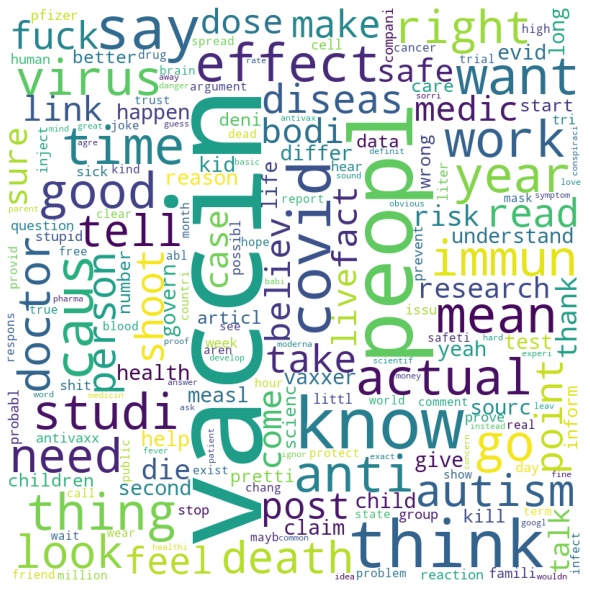

In [137]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', stopwords=stopwords,
                min_font_size = 10,collocations=False).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Pair-wise Count  & Connectivity Analysis


In [138]:
preprocessed

[['hear', 'interest', 'know'],
 ['true',
  'fund',
  'melinda',
  'gate',
  'foundat',
  'provaccin',
  'video',
  'disclos',
  'video',
  'discript',
  'video',
  'fund',
  'exampl'],
 ['video', 'question', 'fund', 'gate', 'foundat'],
 ['variant'],
 ['correct',
  'takeaway',
  'vaccin',
  'aren',
  'work',
  'efficaci',
  'lower',
  'massag',
  'data',
  'pharma',
  'compani',
  'variant',
  'creat',
  'evad',
  'unfortun',
  'tell',
  'peopl',
  'vaccin',
  'need',
  'step',
  'speed',
  'breadth',
  'process',
  'fear',
  'improv',
  'version',
  'come',
  'handl',
  'variant',
  'lather',
  'rins',
  'repeat',
  'realiti',
  'vaccin',
  'hospit',
  'rat',
  'temporarili',
  'slow',
  'spread',
  'keep',
  'cough',
  'sneez',
  'immun',
  'confer',
  'abil',
  'infect',
  'exist',
  'vaccin',
  'induc',
  'variant',
  'pandem',
  'extend',
  'instead',
  'contain',
  'care',
  'pharma',
  'make',
  'money',
  'busi',
  'reopen',
  'caus',
  'sure',
  'health'],
 ['come',
  'guy',
  

In [146]:
p=[]
def pairwise(iterable):
    """s -> (s0,s1), (s1,s2), (s2, s3), ..."""
    a, b = itertools.tee(iterable)
    next(b, None)
    return ((a, b) if a < b else (b, a) for a, b in zip(a, b))

In [148]:
for i in preprocessed:
    p+=list(pairwise(i))

In [151]:
flat_list = list(itertools.chain(*p))

In [157]:
import collections
pairwise_count=collections.Counter(p)

In [158]:
pairwise_count

Counter({('hear', 'interest'): 2,
         ('interest', 'know'): 2,
         ('fund', 'true'): 1,
         ('fund', 'melinda'): 1,
         ('gate', 'melinda'): 1,
         ('foundat', 'gate'): 4,
         ('foundat', 'provaccin'): 1,
         ('provaccin', 'video'): 1,
         ('disclos', 'video'): 2,
         ('discript', 'video'): 2,
         ('fund', 'video'): 1,
         ('exampl', 'fund'): 1,
         ('question', 'video'): 1,
         ('fund', 'question'): 1,
         ('fund', 'gate'): 3,
         ('correct', 'takeaway'): 1,
         ('takeaway', 'vaccin'): 1,
         ('aren', 'vaccin'): 15,
         ('aren', 'work'): 1,
         ('efficaci', 'work'): 2,
         ('efficaci', 'lower'): 1,
         ('lower', 'massag'): 1,
         ('data', 'massag'): 1,
         ('data', 'pharma'): 1,
         ('compani', 'pharma'): 4,
         ('compani', 'variant'): 1,
         ('creat', 'variant'): 1,
         ('creat', 'evad'): 1,
         ('evad', 'unfortun'): 1,
         ('tell', 'unfortu

In [166]:
{x: count for x, count in pairwise_count.items()if count >=3}


{('foundat', 'gate'): 4,
 ('fund', 'gate'): 3,
 ('aren', 'vaccin'): 15,
 ('compani', 'pharma'): 4,
 ('peopl', 'tell'): 21,
 ('peopl', 'vaccin'): 99,
 ('need', 'vaccin'): 32,
 ('hospit', 'vaccin'): 3,
 ('cough', 'sneez'): 3,
 ('exist', 'vaccin'): 9,
 ('make', 'pharma'): 3,
 ('make', 'money'): 5,
 ('fauci', 'say'): 3,
 ('case', 'covid'): 14,
 ('post', 'vaccin'): 11,
 ('articl', 'read'): 20,
 ('herd', 'immun'): 47,
 ('exist', 'immun'): 5,
 ('herd', 'vaccin'): 4,
 ('covid', 'immun'): 8,
 ('covid', 'vaccin'): 160,
 ('better', 'immun'): 3,
 ('alleg', 'vaccin'): 6,
 ('misinform', 'vaccin'): 3,
 ('actual', 'misinform'): 4,
 ('actual', 'point'): 3,
 ('look', 'want'): 3,
 ('ask', 'vaccin'): 4,
 ('caus', 'vaccin'): 161,
 ('autism', 'caus'): 87,
 ('autism', 'vaccin'): 33,
 ('mainstream', 'media'): 6,
 ('make', 'think'): 14,
 ('conspiraci', 'theori'): 21,
 ('make', 'vaccin'): 10,
 ('mandatori', 'vaccin'): 10,
 ('bodi', 'choic'): 7,
 ('choic', 'want'): 4,
 ('good', 'want'): 4,
 ('sourc', 'sourc'): 4